In [16]:
library(tm)
docs <- read.csv("D:\\TEXTproject\\datafiles\\part1.csv", header = FALSE)
#Making it in a corpus.
docs <- VectorSource(docs)
docs <- VCorpus(docs)


In [17]:
docs <- tm_map(docs,removePunctuation)   
docs <- tm_map(docs, removeNumbers)   
docs <- tm_map(docs, tolower) 
docs <- tm_map(docs, removeWords, stopwords("english"))  
#add custom stopwords in the below vector
docs <- tm_map(docs, removeWords, c())   
docs <- tm_map(docs, stripWhitespace)
docs <- tm_map(docs, PlainTextDocument)
#use when playing,plays,played to single word play 
#docs <- tm_map(docs, stemDocument)

In [18]:
head(docs)
dtm <- TermDocumentMatrix(docs)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)
head(d, 10)

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 2

,word,freq
even,even,24
system,system,22
space,space,21
one,one,18
time,time,18
years,years,18
can,can,15
will,will,15
also,also,14
first,first,13


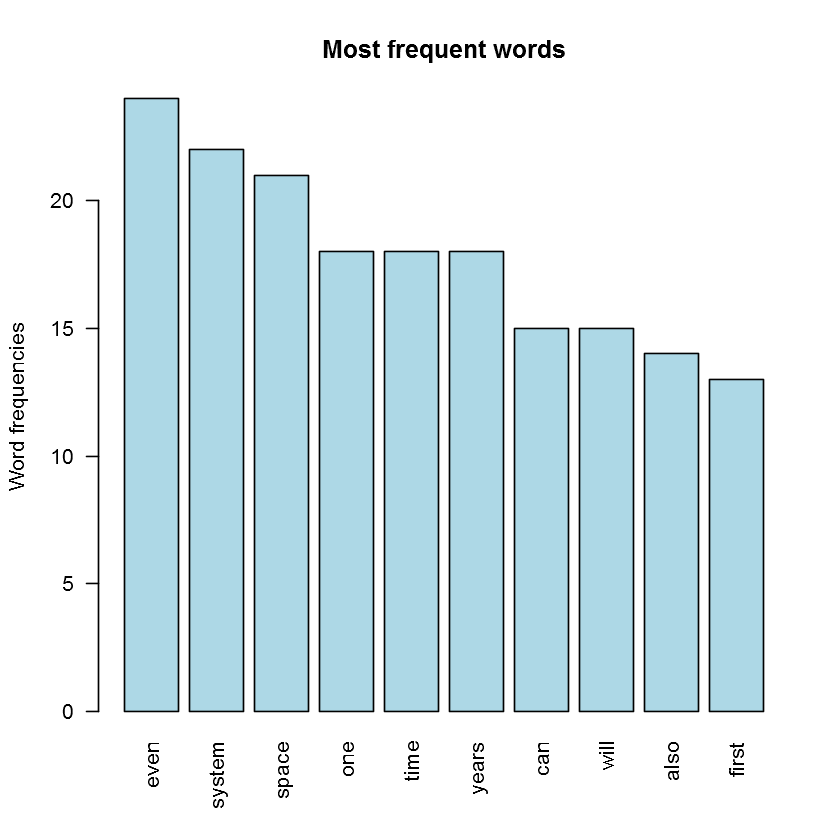

In [19]:
barplot(d[1:10,]$freq, las = 2, names.arg = d[1:10,]$word,
        col ="lightblue", main ="Most frequent words",
        ylab = "Word frequencies")

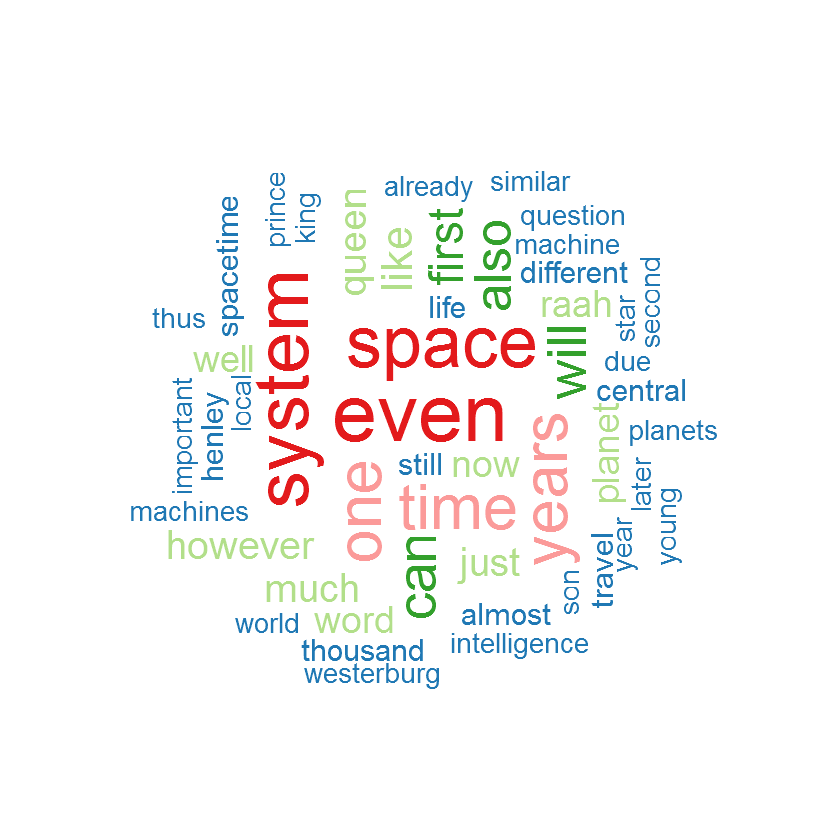

In [26]:
library(wordcloud)
wordcloud(words = d$word, freq = d$freq, min.freq = 2,
          max.words=50, random.order=FALSE, rot.per=0.40, 
          colors=brewer.pal(6, "Paired"))
#replace Paired with Dark2 for goodlook